## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [2]:
average_ratings = np.load('data/average_ratings.npy')

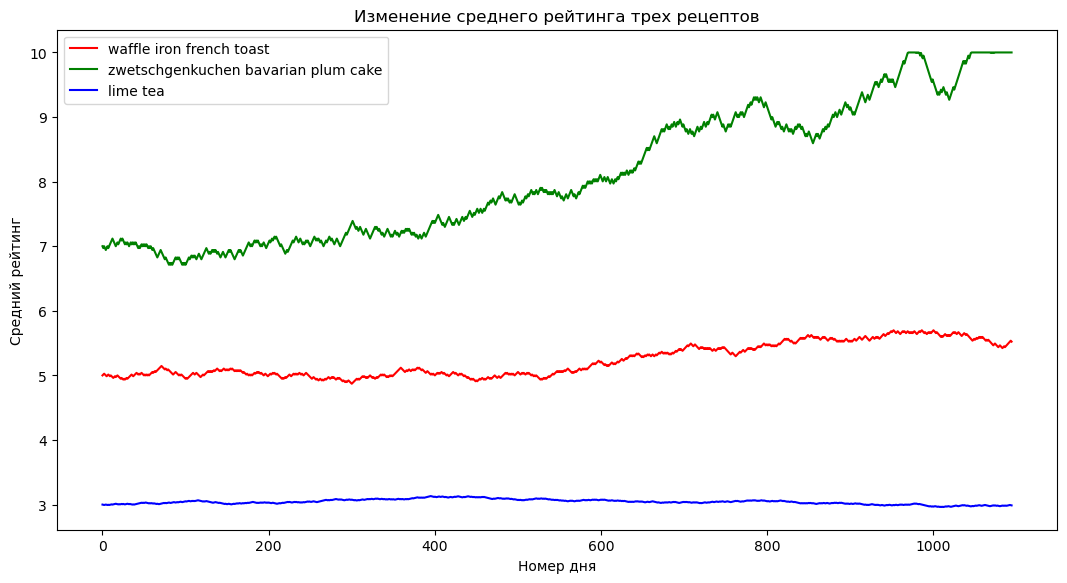

In [3]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0.1, 0.1, 1, 1])
gr1, = ax.plot(average_ratings[0], label='waffle iron french toast', color='r')
gr2, = ax.plot(average_ratings[1], label='zwetschgenkuchen bavarian plum cake', color='g')
gr3, = ax.plot(average_ratings[2], label='lime tea', color='b')
ax.legend(handles=[gr1, gr2, gr3])
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг');

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


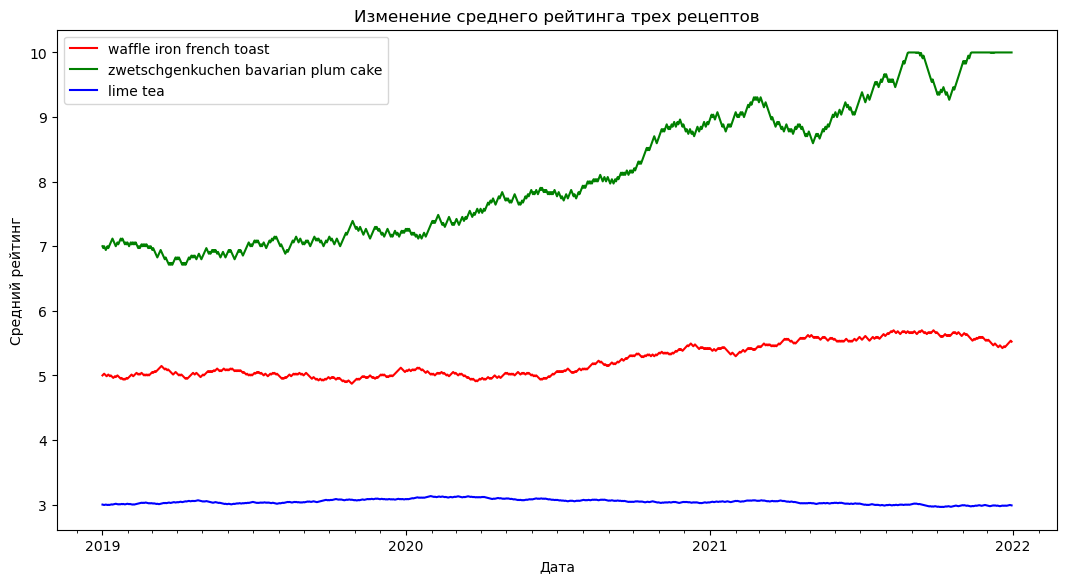

In [4]:
dates = pd.date_range(start='1/1/2019', end='12/30/2021')
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0.1, 0.1, 1, 1])
gr1, = ax.plot(dates, average_ratings[0], label='waffle iron french toast', color='r')
gr2, = ax.plot(dates, average_ratings[1], label='zwetschgenkuchen bavarian plum cake', color='g')
gr3, = ax.plot(dates, average_ratings[2], label='lime tea', color='b')
ax.legend(handles=[gr1, gr2, gr3])
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.set_xlabel('Дата')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.set_ylabel('Средний рейтинг');

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

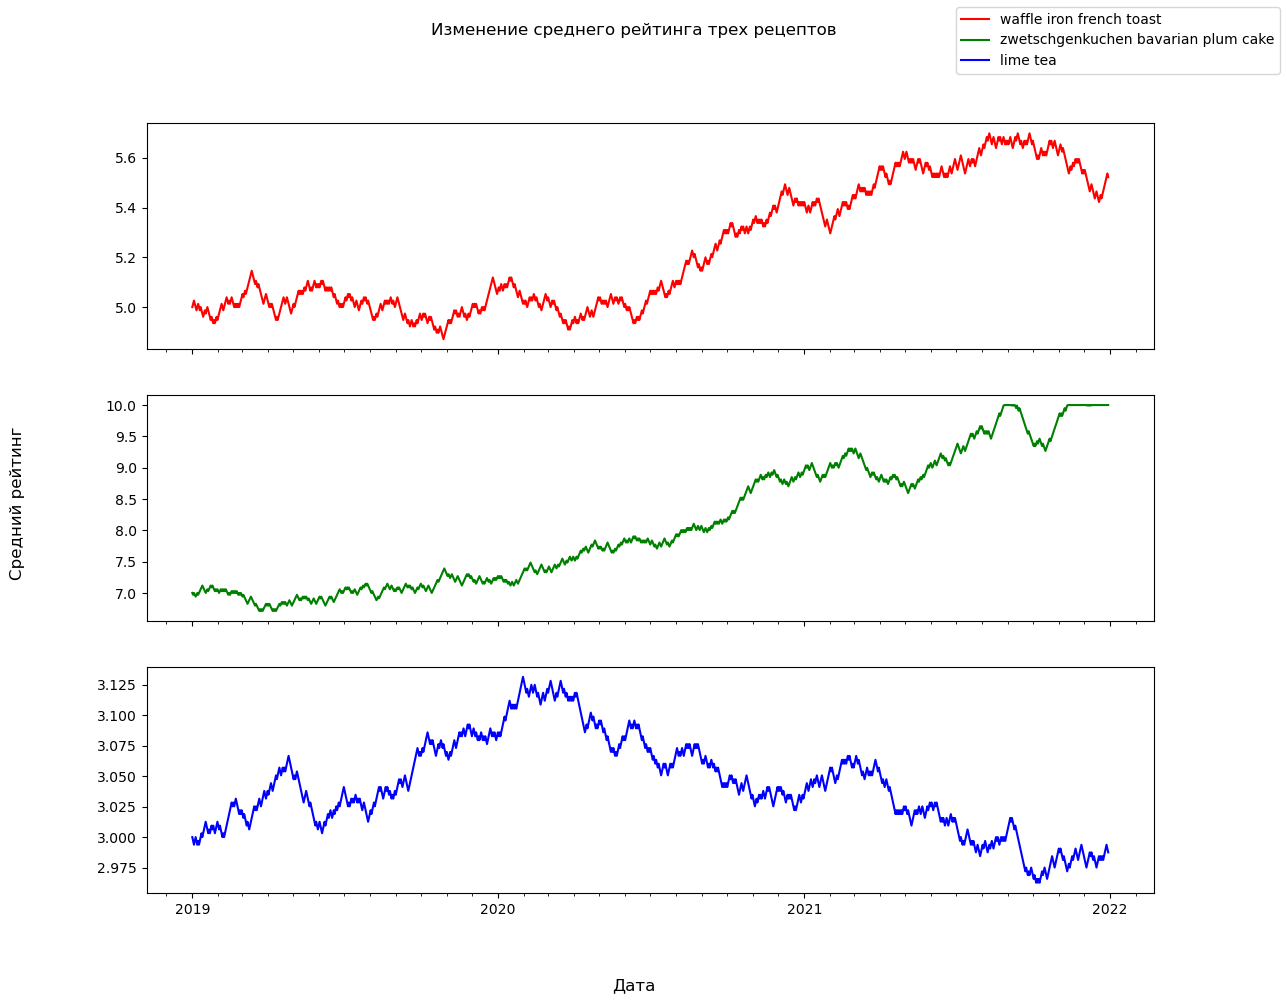

In [5]:
dates = pd.date_range(start='1/1/2019', end='12/30/2021')
labels = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']
colors = ['r', 'g', 'b']
gr = ['','','']
fig, ax = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(13, 10)
for i in range(3):
    gr[i], = ax[i].plot(dates, average_ratings[i], label=labels[i], color=colors[i])
    ax[i].xaxis.set_major_locator(mdates.YearLocator())
    ax[i].xaxis.set_minor_locator(mdates.MonthLocator())
fig.legend(handles=gr)

fig.suptitle('Изменение среднего рейтинга трех рецептов')
fig.supxlabel('Дата')
fig.supylabel('Средний рейтинг');

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтали. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком с текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [6]:
visitors = np.load('data/visitors.npy')

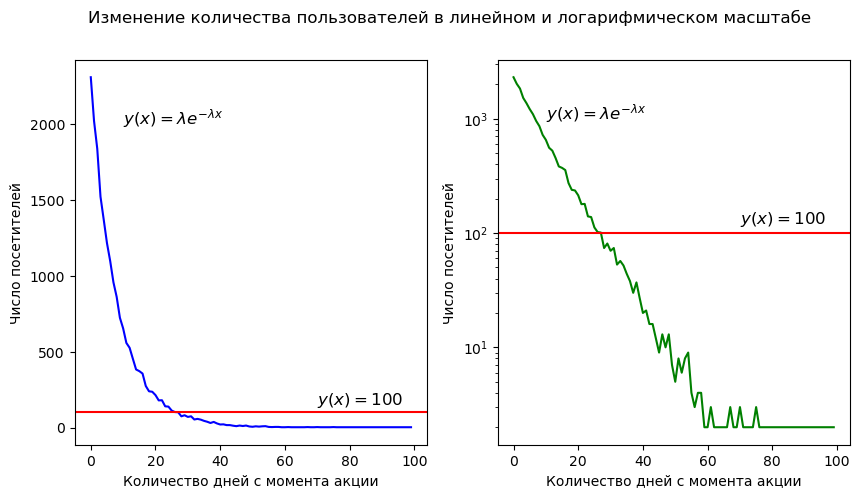

In [7]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

gr1 = ax[0].plot(visitors,  color='b')
ax[0].text(10, 2000, r'$y(x)=\lambda e^{-\lambda x}$', fontsize=12)
ax[0].axhline (y=100, color='red') 
ax[0].text(70, 150, r'$y(x)=100$', fontsize=12)
ax[0].set_xlabel('Количество дней с момента акции')
ax[0].set_ylabel('Число посетителей')

ax[1].set_yscale("log")
gr2 = ax[1].plot(visitors, color='g')
ax[1].text(10, 1000, r'$y(x)=\lambda e^{-\lambda x}$', fontsize=12)
ax[1].axhline (y=100, color='red') 
ax[1].text(70, 120, r'$y(x)=100$', fontsize=12)
ax[1].set_xlabel('Количество дней с момента акции')
ax[1].set_ylabel('Число посетителей')

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе');

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [8]:
reviews = pd.read_csv('data/reviews_sample.csv', index_col=0, parse_dates=['date'])
recipes = pd.read_csv('data/recipes_sample.csv', parse_dates=['submitted'])

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

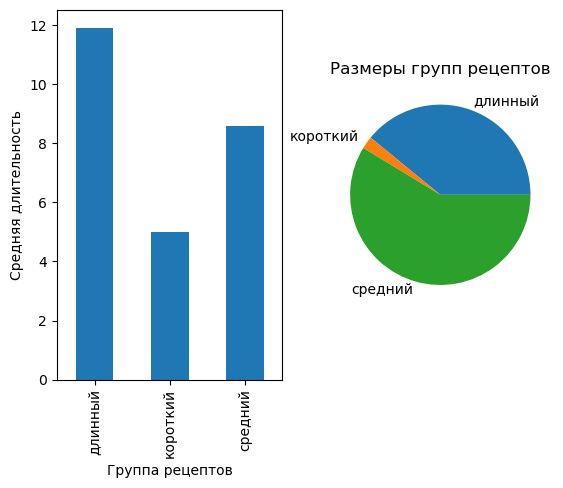

In [9]:
conditions = [
    (recipes['minutes'] < 5),
    (5 <= recipes['minutes']) & (recipes['minutes'] < 50),
    (recipes['minutes'] >= 50)
]
 
values = ['короткий', 'средний', 'длинный']
recipes['Группа рецептов'] = np.select(conditions, values)
df = recipes.groupby('Группа рецептов').agg({'id':'size', 'n_steps':'mean'})
df.rename(columns = {'id':'Размеры групп рецептов', 'n_steps':'Средняя длительность'}, inplace = True )

fig, axes = plt.subplots(1, 2)
ax1 = df.plot.bar(ax=axes[0], y = 'Средняя длительность')
ax1.set_ylabel('Средняя длительность')
ax1.legend().remove()

ax2 = df.plot.pie(ax=axes[1], y = 'Размеры групп рецептов')
ax2.legend().remove()
ax2.set_ylabel(None)
ax2.set_title('Размеры групп рецептов');

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

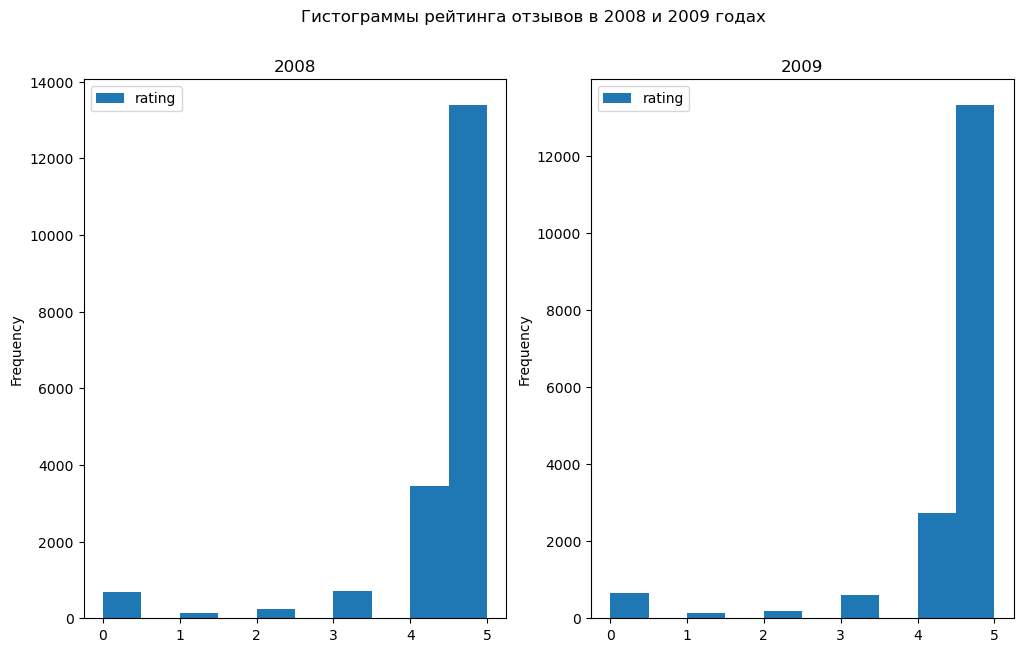

In [10]:
reviews['year'] = reviews['date'].dt.year
data = reviews[(reviews['year'] == 2008) | (reviews['year'] == 2009)][['year', 'rating']]
data
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
ax = data.plot.hist(ax=axs, subplots=True, column=["rating"], by="year")
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах');

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [11]:
import seaborn as sns

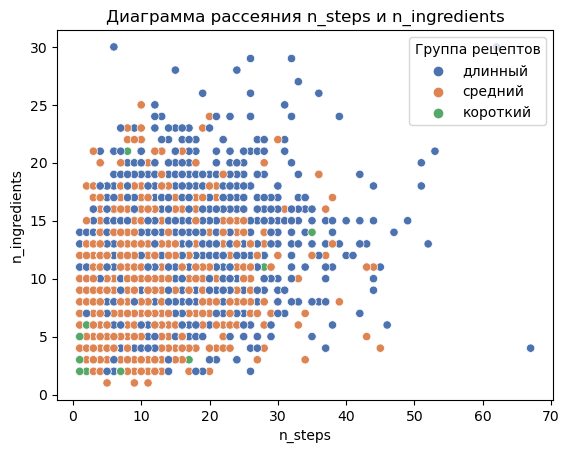

In [12]:
sns.scatterplot(
    x='n_steps', 
    y='n_ingredients', 
    data=recipes, 
    hue='Группа рецептов', palette="deep").set(title='Диаграмма рассеяния n_steps и n_ingredients');

Отсутствует линейная корреляция

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [13]:
merged = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id', how='inner')[[ "minutes", "n_steps", "n_ingredients", "rating"]]
merged.corr()

,minutes,n_steps,n_ingredients,rating
minutes,1.000000,0.030675,-0.006254,-0.025770
n_steps,0.030675,1.000000,0.293526,-0.019057
n_ingredients,-0.006254,0.293526,1.000000,0.003405
rating,-0.025770,-0.019057,0.003405,1.000000


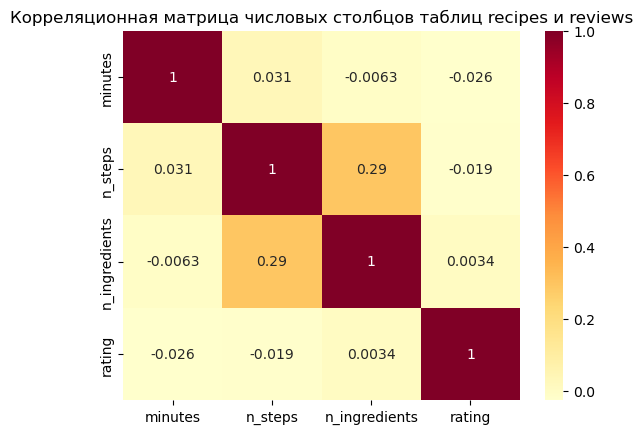

In [19]:
heat_map = sns.heatmap(merged.corr(), annot=True, cmap="YlOrRd")
heat_map.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews');